### Summary

Insurance covers the risk for the insured. The insured may be the property, vehicle or a person. There are various types of insurance like life insurance, personal insurance, automobile insurance, accident insurance etc. 

Here we are provided a dataset of automobile insurance along with the fraud reported. Many aspects relating to the insurance details, personal details of the insured are captured to understand if there are any factors which influence the fraud.

#### Purpose of detecting 

If we detect the influencing factors and build a predictive model, an Insurance Company can be cautious while approving such claims in future. Here we have analysed the data in detail and built a model which gives highest prediction for detecting the fraud.

The problem situation is classification and we will be checking various classification models for the same.



In [48]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
#importing the dataset into notebook
df=pd.read_csv("auto_fraud.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [50]:
#Checking the shape of the dataframe
df.shape
#There are 1000 rows and 40 columns in the dataset

(1000, 40)

In [51]:
#checking the datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

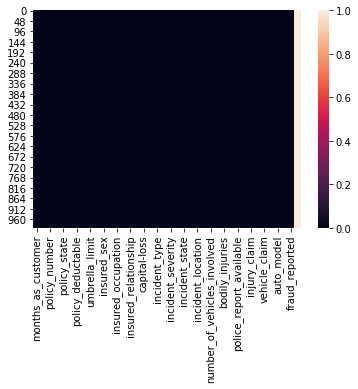

In [52]:
#Checking for missing values
sns.heatmap(df.isnull())

In [53]:
df.isnull().sum()
#There are no null values in the dataset

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [54]:
#_c39 has only missing values. so we can drop that column
df1=df.drop('_c39',axis=1)
df1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


#### Univariate Analysis

In [55]:
col_name=[]
unique_value=[]

for i in df1.columns:
    if df[i].dtype=='O':
        col_name.append(str(i))
        unique_value.append(df[i].nunique())

table=pd.DataFrame()
table['column_name']=col_name
table['Value']=unique_value

table=table.sort_values('Value', ascending=False)
table

,column_name,Value
15,incident_location,1000
0,policy_bind_date,951
8,incident_date,60
19,auto_model,39
6,insured_hobbies,20
18,auto_make,14
5,insured_occupation,14
4,insured_education_level,7
14,incident_city,7
13,incident_state,7


In [56]:
df1.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [57]:
# After analysing the above, we can drop the columns with counts over 20 as it is of no much use to the analysis or modelling.
df2=df1.drop(['incident_location','policy_bind_date','incident_date','auto_model','policy_number', 'insured_zip' ],axis=1)
df2.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,2009,N


In [58]:
#new shape of the dataset
df2.shape

(1000, 33)

In [59]:
#Check the unique value counts of the columns 
for i in df2.columns:
    if df2[i].dtypes=='O':
        print(df2[i].value_counts())
        print()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
movies            55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving 

Observations
1) The total no. of cases which are not fraud is 753 and which are fraud are 247.
2) The auto make are 14 types.
3) Police report availability is of two types No is 343, Yes is 343 and there are few missing values represented by ? which is 314 nos.
4) Property damage - 302 property have been damaged, 335 have not been damaged and 360 missing values are represented by ?
5) Incident city - There are seven cities in which incident has been taken place.
6) Incident State - There are seven states in the category.
7) Authorities contact - Police, Fire, Other, Ambulance and None are the categories here.
8) Incident severity - There are 4 types:- minor damage, total loss, major damage and trivial damage
9) Collision types - Are of 4 types:- Rear, Side, Front collision are the 3 types. The fourth type is missing and represented by '?'.
10) Incident type - There are 4 types:- Multi vehicle collision, single vehicle collision, vehicle theft and parked car.
11) Insured relationship - This is of six categories - own-child, other-relative, not in family, husband, wife and unmarried.
12) Insured hobbies - Different hobbies of the insured are mentioned.
13) Insured occupation - Different types of occupation of the insured are mentioned.
14) Insured_education_level - There are seven categories in the same.
15) Policy state - OH for Ohio , IL for Illinios, Ind for Indiana.
16) Policy CSL means Combined Single Limit
CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.

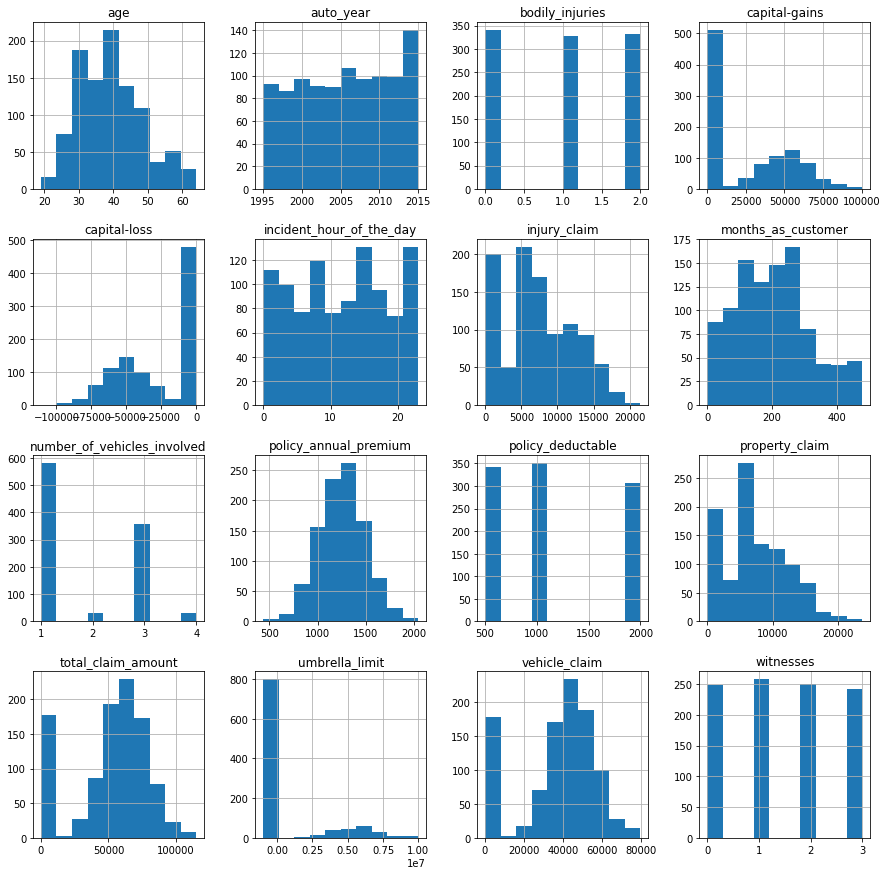

In [60]:
#checking the distribution of the data
df2.hist(figsize=(15,15))
plt.show()

Observations:
1. Most of the distribution graphs looks symmetric.

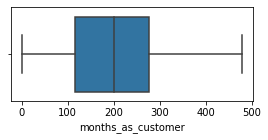

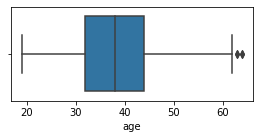

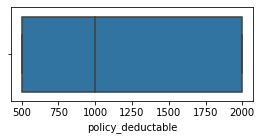

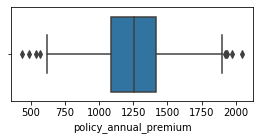

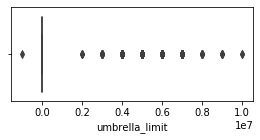

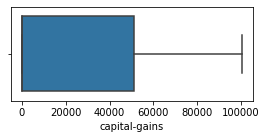

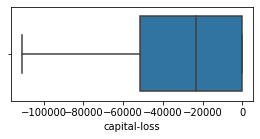

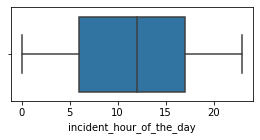

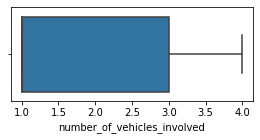

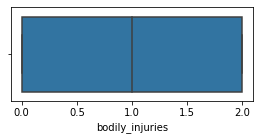

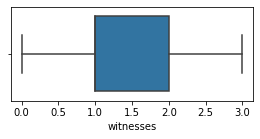

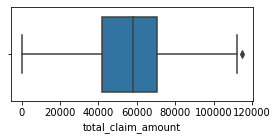

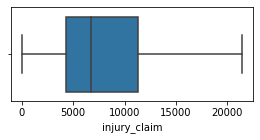

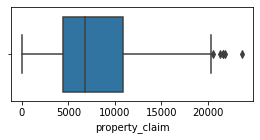

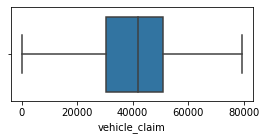

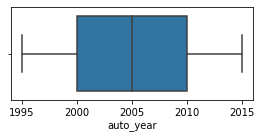

In [61]:
#checking the distribution of the data
for i in df2.columns:
    if df2[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(df2[i])

Observations:
1. There are very few outliers in the data.

#### Statistical Analysis

In [62]:
df2.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [63]:
df2.groupby('fraud_reported').mean()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
fraud_reported,,,,,,,,,,,,,,,,
N,202.600266,38.884462,1130.810093,1258.430000,1.023904e+06,25432.005312,-26554.581673,11.626826,1.808765,0.976096,1.455511,50288.605578,7179.229748,7018.884462,36090.491368,2005.075697
Y,208.080972,39.141700,1151.821862,1250.236275,1.336032e+06,24193.522267,-27522.672065,11.696356,1.931174,1.040486,1.582996,60302.105263,8208.340081,8560.121457,43533.643725,2005.186235


Observations
1. For those where fraud is detected, the avg months as customers is higher than those where fraud is not detected. 
2. Where fraud is detected, the total claim amount, injury claim, property claim and vehicle claim are higher than where fraud is not detected.

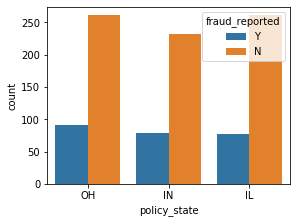

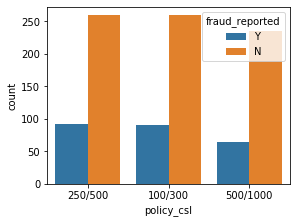

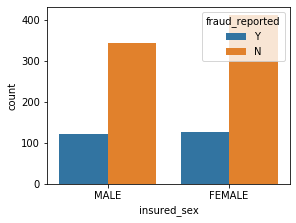

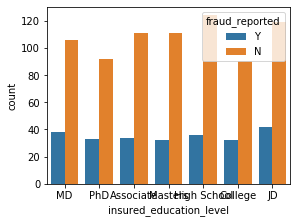

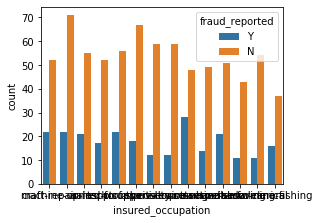

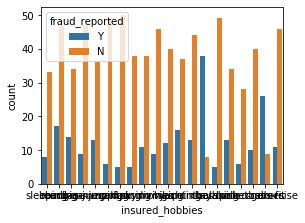

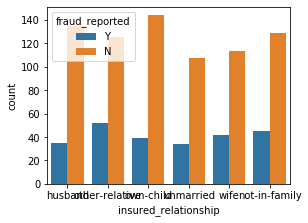

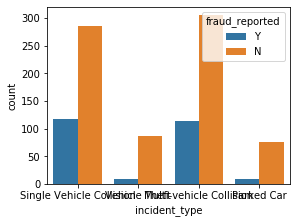

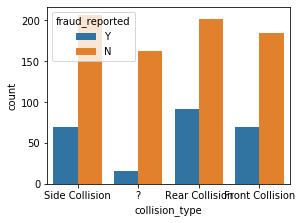

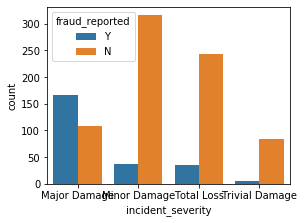

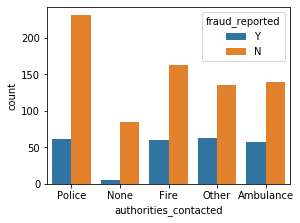

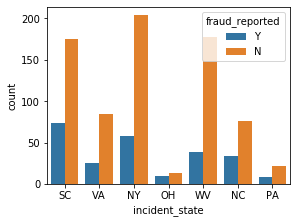

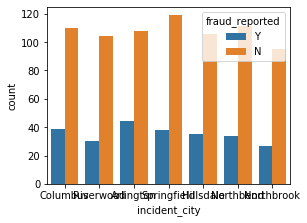

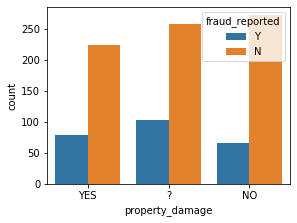

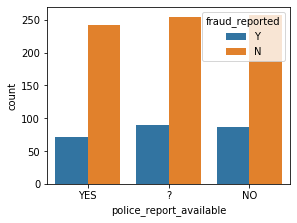

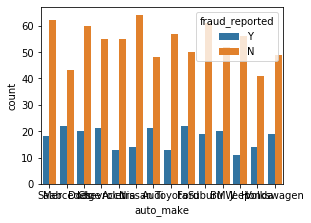

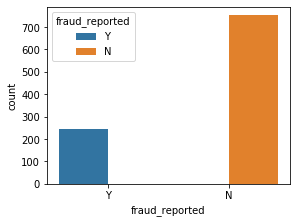

In [64]:
#checking the count plot of categorical variables along with camparison of fraud detection
for i in df2.columns:
    if df2[i].dtype=='O':
        plt.figure(figsize=(20,15))
        plt.subplot(4,4,2)
        sns.countplot(df2[i], hue=df2['fraud_reported'])
        plt.show()

Observations
1. Police Report - The no. of frauds is little less where police report is available when compared to the cases where police report is not available or where there is no information about that.
2. Property damage - Frauds are more where there is no information on property damage and where there is property damage.
3. Policy State - There is no much difference of frauds reported with respect to policy state.
4. Policy_csl - There is little less frauds detected in policy_csl 500/1000
5. Insured sex - There is no much difference in terms of gender in no. of cases reported as fraud. However, female ratio of fraud is lesser than of male.
6. collision_type - Most of the collision reported is Rear Collision.
7. Incident severity - Where there is major damage, the no. of frauds reported is more.
8. Incident state - More cases are reported in SC and NY.


In [65]:
pd.crosstab(df2['fraud_reported'],df2['insured_hobbies'])

insured_hobbies,base-jumping,basketball,board-games,bungie-jumping,camping,chess,cross-fit,dancing,exercise,golf,hiking,kayaking,movies,paintball,polo,reading,skydiving,sleeping,video-games,yachting
fraud_reported,,,,,,,,,,,,,,,,,,,,
N,36,28,34,47,50,8,9,38,46,49,40,49,46,44,34,47,38,33,40,37
Y,13,6,14,9,5,38,26,5,11,6,12,5,9,13,13,17,11,8,10,16


1) The highest no. of frauds are reported from the people who play chess, followed by those who do cross-fit.
2) Least no. of frauds are detected amongst who do camping, dancing and kayaking at 5 nos.

In [66]:
pd.crosstab(df2['fraud_reported'],df2['insured_occupation'])

insured_occupation,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving
fraud_reported,,,,,,,,,,,,,,
N,54,52,52,48,37,43,71,59,59,67,49,55,56,51
Y,11,17,22,28,16,11,22,12,12,18,14,21,22,21


1) More frauds are detected where the occupation is exec- managerial followed by craft-repair and machine-op-instinct

In [67]:
pd.crosstab(df2['fraud_reported'],df2['insured_relationship'])

insured_relationship,husband,not-in-family,other-relative,own-child,unmarried,wife
fraud_reported,,,,,,
N,135,129,125,144,107,113
Y,35,45,52,39,34,42


1) More frauds are detected where the insured relationship is other relative, followed by not in family and later followed by wife and so on

In [68]:
pd.crosstab(df2['fraud_reported'],df2['incident_type'])

incident_type,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
fraud_reported,,,,
N,305,76,286,86
Y,114,8,117,8


1) Most frauds are detected in Single vehicle collision later followed by Multi vehicle collision

In [69]:
pd.crosstab(df2['fraud_reported'],df2['incident_city'])

incident_city,Arlington,Columbus,Hillsdale,Northbend,Northbrook,Riverwood,Springfield
fraud_reported,,,,,,,
N,108,110,106,111,95,104,119
Y,44,39,35,34,27,30,38


1) Higher no of frauds are reported in Arlington city and least is reported in Northbrook.

In [70]:
pd.crosstab(df2['fraud_reported'],df2['auto_make'])

auto_make,Accura,Audi,BMW,Chevrolet,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
fraud_reported,,,,,,,,,,,,,,
N,55,48,52,55,60,50,41,56,43,64,62,61,57,49
Y,13,21,20,21,20,22,14,11,22,14,18,19,13,19


1) Least no. of frauds are reported for Jeep, followed by Toyata and Accura. 

In [71]:
pd.crosstab(df2['fraud_reported'],df2['insured_education_level'])

insured_education_level,Associate,College,High School,JD,MD,Masters,PhD
fraud_reported,,,,,,,
N,111,90,124,119,106,111,92
Y,34,32,36,42,38,32,33


1) More no. of frauds are done by those who have completed JD, followed by MD and later by Associates

In [72]:
pd.crosstab(df2['fraud_reported'],df2['number_of_vehicles_involved'])

number_of_vehicles_involved,1,2,3,4
fraud_reported,,,,
N,448,21,264,20
Y,133,9,94,11


1) More fraud is reported when the vehicle involved is one and followed by three

#### Conclusion

###### The major factors influencing the fraud incidence are:-

1. High education doesnot mean less crime as major of the frauds are committed by JD - Graduation in law and MD - Doctor of Medicine. Even less educated of upto Highschool have reported similar no. of frauds.

2. Property Damage - Where there is property damage, there is little higher incidence of frauds.

3. collision_type - Most of the frauds are reported when there is Rear Collision.

4. Incident severity - Where there is major damage, the no. of frauds reported is more.

5. Incident state - More cases are reported in SC and NY.

6. Hobbies - The highest no. of frauds are reported from the people who play chess.

7. Relationship with insured - More frauds are detected where the insured relationship is other relative.

8. Incident Type -  Most frauds are detected in Single vehicle collision later followed by Multi vehicle collision.

9. No. of vehicles involved- When there is one vehicle involved, more fraud is detected.

#Handling missing data

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


?      360
NO     338
YES    302
Name: property_damage, dtype: int64

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


There are few values represented by ? in the columns like Collision Type, Property Damage and Police Report available. But the count of ? is significant enough, so it cannot be filled with other values derived by calculating mode or median and the columns are also important which can not be removed. Hence, it is apt to retain them as it is as a separate group.

#### Checking correlation


In [73]:
df2.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,-0.020527


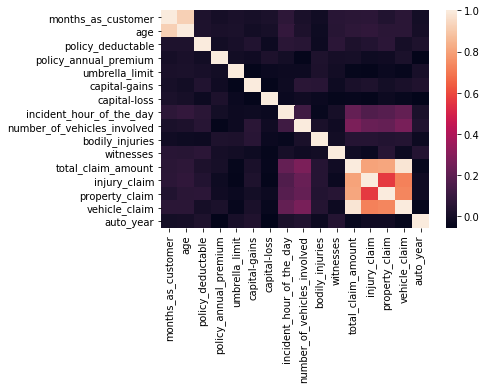

In [74]:
sns.heatmap(df2.corr())

Observations:
1. Total claim amount, injury claim, property claim, vehicle claim are positively correlated with each other.
2. Age and months as customer are positively correlated to each other.

In [75]:
df2.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,2009,N


In [76]:
#Using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in ['policy_state', 'policy_csl','insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
'authorities_contacted', 'incident_state', 'incident_city','property_damage', 'police_report_available', 'auto_make', 'fraud_reported']:
    df2[i]=lb.fit_transform(df2[i])
df2.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,3,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,2004,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,0,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,2007,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,2,1,4,1,1,7,3,1,2,3,1,34650,7700,3850,23100,4,2007,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,1,0,4,2,0,5,1,0,1,2,1,63400,6340,6340,50720,3,2014,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,0,1,2,1,0,20,1,1,0,1,1,6500,1300,650,4550,0,2009,0


#### Removing outliers

In [77]:
#checking for outliers
from scipy.stats import zscore
z=zscore(df2)
print(df2.shape)
df3=df2[(z<3).all(axis=1)]
print(df3.shape)

(1000, 33)
(983, 33)


In [78]:
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 262, 314, 430, 458, 500, 503, 657,
       700, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  6,  6,  6,  6, 28,  6,  6,  6,  6,  6,  6],
      dtype=int64))


### Separating the input and the output variable

In [79]:
x=df3.iloc[:,0:-1]
y=pd.DataFrame(df3.iloc[:,-1])
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,3,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,2004
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,0,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,2007
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,2,1,4,1,1,7,3,1,2,3,1,34650,7700,3850,23100,4,2007
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,1,0,4,2,0,5,1,0,1,2,1,63400,6340,6340,50720,3,2014
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,0,1,2,1,0,20,1,1,0,1,1,6500,1300,650,4550,0,2009


In [80]:
y.head()

,fraud_reported
0,1
1,1
2,0
3,1
4,0


#### checking skewness

In [81]:
x.skew()
# Almost all values are skewed. So we can go ahead with the data

months_as_customer             0.366303
age                            0.478261
policy_state                  -0.036113
policy_csl                     0.096017
policy_deductable              0.475798
policy_annual_premium         -0.017987
umbrella_limit                 1.806345
insured_sex                    0.140949
insured_education_level        0.006218
insured_occupation            -0.056178
insured_hobbies               -0.061328
insured_relationship           0.075774
capital-gains                  0.466842
capital-loss                  -0.389587
incident_type                  0.094891
collision_type                -0.191838
incident_severity              0.280436
authorities_contacted         -0.110122
incident_state                -0.149207
incident_city                  0.045063
incident_hour_of_the_day      -0.034787
number_of_vehicles_involved    0.505944
property_damage                0.104630
bodily_injuries                0.005622
witnesses                      0.021612


### Scaling the data

In [82]:
#using the minmaxscaler to scale the input variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.072266,0.985950,1.182017,0.065804,-0.224775,0.620417,-0.467008,1.072840,0.533081,-1.154822,1.276895,-1.439295,1.001447,0.954647,0.764135,1.257418,-1.259125,1.201022,0.351713,-0.972508,-0.956129,-0.821460,1.301008,0.003733,0.462903,1.266215,0.718622,-0.188231,1.174878,0.754593,0.850693,-0.188920
1,0.205102,0.332197,-0.023297,0.065804,1.411919,-0.239797,1.894456,1.072840,0.533081,-0.159260,0.924957,-0.250365,-0.907668,0.954647,1.690330,-1.566745,-0.193962,1.201022,0.815786,0.990481,-0.525652,-0.821460,-1.160765,-1.219466,-1.335648,-1.205859,-1.807370,-1.361324,-1.378874,-1.823108,0.354413,0.309404
2,-0.610031,-1.084268,1.182017,-1.178151,1.411919,0.645974,1.894456,-0.932106,1.557556,1.085194,-1.362642,0.344100,0.349554,0.954647,-1.088256,0.316030,-0.193962,1.201022,-1.040505,-0.972508,-0.669144,1.143249,0.070122,1.226932,1.362178,0.030178,-0.684454,0.055395,-0.738350,-0.783430,-0.638146,0.309404
3,0.447908,0.223238,-1.228611,0.065804,1.411919,0.656640,2.366749,-0.932106,1.557556,-1.403713,-1.362642,0.938565,0.843847,-1.269287,0.764135,-0.625357,-1.259125,1.201022,-0.576432,-1.463255,-0.956129,-0.821460,-1.160765,0.003733,0.462903,0.030178,0.406954,-0.223035,-0.218836,0.682415,-0.886286,1.472159
4,0.205102,0.550115,-1.228611,1.309759,-0.224775,1.346526,2.366749,1.072840,-1.515868,1.085194,-1.362642,0.938565,1.456340,-0.684791,1.690330,-1.566745,-0.193962,-0.104235,-1.040505,-1.463255,1.196256,-0.821460,0.070122,-1.219466,-0.436373,0.030178,-1.753085,-1.254865,-1.405997,-1.767913,-1.630705,0.641619


#### selecting the best random state for splitting the data

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [84]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score at r_state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [85]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

The accuracy score at r_state 42 is 0.751269035532995
The accuracy score at r_state 43 is 0.7563451776649747
The accuracy score at r_state 44 is 0.7360406091370558
The accuracy score at r_state 45 is 0.766497461928934
The accuracy score at r_state 46 is 0.7918781725888325
The accuracy score at r_state 47 is 0.7411167512690355
The accuracy score at r_state 48 is 0.7817258883248731
The accuracy score at r_state 49 is 0.7614213197969543
The accuracy score at r_state 50 is 0.7411167512690355
The accuracy score at r_state 51 is 0.7868020304568528
The accuracy score at r_state 52 is 0.766497461928934
The accuracy score at r_state 53 is 0.7817258883248731
The accuracy score at r_state 54 is 0.7563451776649747
The accuracy score at r_state 55 is 0.8071065989847716
The accuracy score at r_state 56 is 0.766497461928934
The accuracy score at r_state 57 is 0.7563451776649747
The accuracy score at r_state 58 is 0.7614213197969543
The accuracy score at r_state 59 is 0.7208121827411168
The accuracy s

0.8477157360406091

In [86]:
#Lets finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=64,test_size=0.20)


Let us check the different models and we need to use GradientSearchCV to bring out the best parameters for the models

#### Using GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [89]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 10, 'kernel': 'linear'}

In [90]:
#After obtaining best parameters, we should now check the models

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
The accuracy score is  0.8477157360406091
The cross val score is 0.7742100901274215

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       161
           1       0.61      0.47      0.53        36

    accuracy                           0.85       197
   macro avg       0.75      0.70      0.72       197
weighted avg       0.84      0.85      0.84       197


[[150  11]
 [ 19  17]]

roc_auc_score 0.7019496204278813


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
       

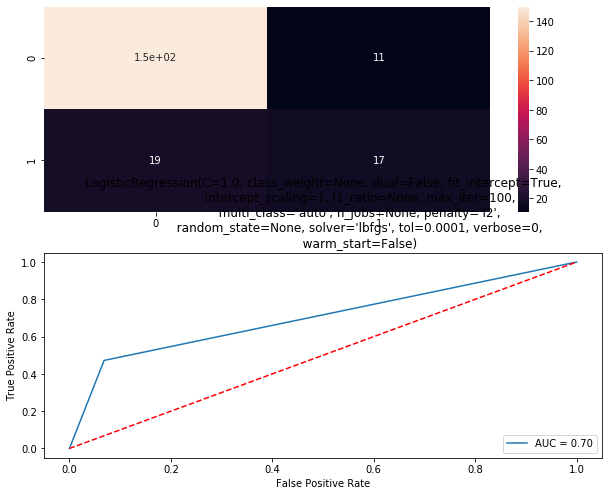

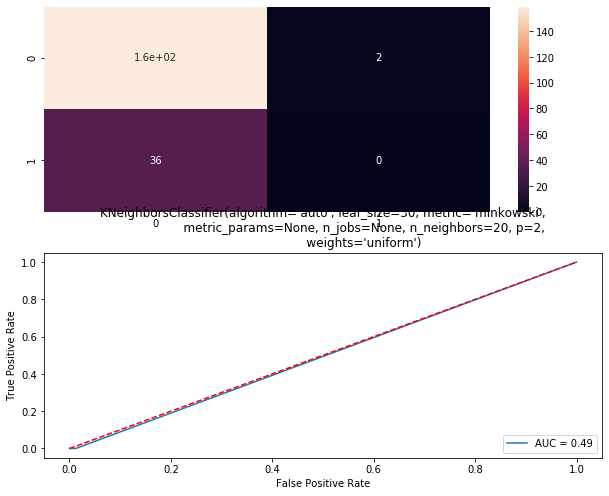

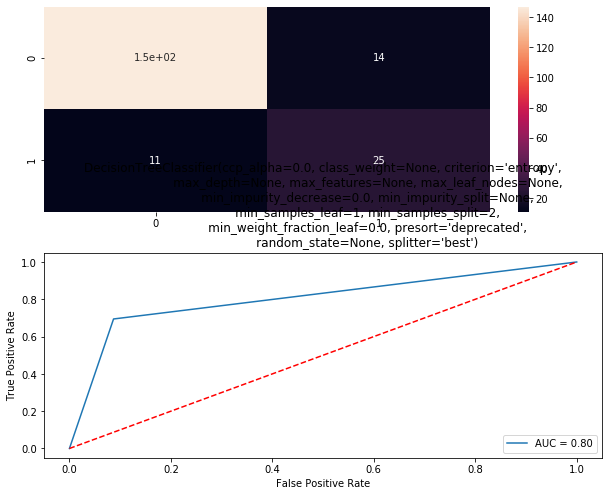

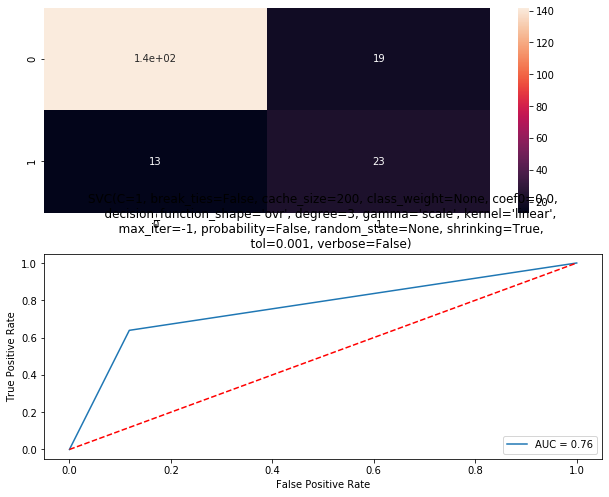

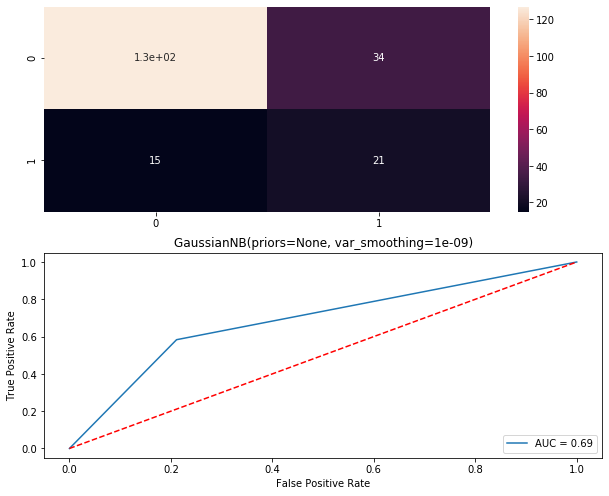

In [91]:
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 20, weights='uniform'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=1, kernel='linear'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("The accuracy score is ", accscore)
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [92]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB()],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.847716,0.774210,0.701950
1,<class 'sklearn.neighbors._classification.KNei...,0.807107,0.753823,0.493789
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.873096,0.757930,0.803744
3,<class 'sklearn.svm._classes.SVC'>,0.837563,0.778250,0.760438
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.751269,0.716233,0.686077


In [93]:
#Let us try ensemble try to achieve more accuracy

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'criterion':('friedman_mse', 'mse', 'mae')}
gd=GridSearchCV(gc,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 500}

In [95]:
#checking the best accuracy score and random state for RandomForestClassifier
gc=GradientBoostingClassifier(criterion='mse', learning_rate= 0.01, n_estimators= 200)
max_acc_score(gc,x,y)

The accuracy score at r_state 42 is 0.8375634517766497
The accuracy score at r_state 43 is 0.8223350253807107
The accuracy score at r_state 44 is 0.8426395939086294
The accuracy score at r_state 45 is 0.8274111675126904
The accuracy score at r_state 46 is 0.8020304568527918
The accuracy score at r_state 47 is 0.7918781725888325
The accuracy score at r_state 48 is 0.8223350253807107
The accuracy score at r_state 49 is 0.8020304568527918
The accuracy score at r_state 50 is 0.7766497461928934
The accuracy score at r_state 51 is 0.817258883248731
The accuracy score at r_state 52 is 0.817258883248731
The accuracy score at r_state 53 is 0.8071065989847716
The accuracy score at r_state 54 is 0.8223350253807107
The accuracy score at r_state 55 is 0.8578680203045685
The accuracy score at r_state 56 is 0.7868020304568528
The accuracy score at r_state 57 is 0.8527918781725888
The accuracy score at r_state 58 is 0.7918781725888325
The accuracy score at r_state 59 is 0.7969543147208121
The accuracy

0.8730964467005076

In [96]:
#checking the cross val score
cs=cross_val_score(gc,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of GradientBoosting classifier is", cs)

The cross val score of GradientBoosting classifier is 0.8148813840256915


In [97]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'algorithm':('SAMME', 'SAMME.R')}
gd=GridSearchCV(ad,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}

In [98]:
#checking the best accuracy score and random state for AdaBoostClassifier
ada=AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 1, n_estimators= 50)
max_acc_score(ada,x,y)

The accuracy score at r_state 42 is 0.7411167512690355
The accuracy score at r_state 43 is 0.7969543147208121
The accuracy score at r_state 44 is 0.7918781725888325
The accuracy score at r_state 45 is 0.7563451776649747
The accuracy score at r_state 46 is 0.8121827411167513
The accuracy score at r_state 47 is 0.7614213197969543
The accuracy score at r_state 48 is 0.7868020304568528
The accuracy score at r_state 49 is 0.7715736040609137
The accuracy score at r_state 50 is 0.751269035532995
The accuracy score at r_state 51 is 0.7817258883248731
The accuracy score at r_state 52 is 0.7614213197969543
The accuracy score at r_state 53 is 0.8274111675126904
The accuracy score at r_state 54 is 0.817258883248731
The accuracy score at r_state 55 is 0.8020304568527918
The accuracy score at r_state 56 is 0.7563451776649747
The accuracy score at r_state 57 is 0.7715736040609137
The accuracy score at r_state 58 is 0.7715736040609137
The accuracy score at r_state 59 is 0.7360406091370558
The accuracy

0.868020304568528

In [99]:
#checking the cross val score
cs=cross_val_score(ada,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of AdaBoost classifier is", cs)

The cross val score of AdaBoost classifier is 0.801662695535067


In [100]:
result2=pd.DataFrame({'Boosters':['RandomForestClassifier','GradientBoostClassifier','AdaBoostRegressor'],'Accuracy Score':[0.868,0.873,0.852],'Cross_val_score':[0.792,0.811,0.763]})
result2

,Boosters,Accuracy Score,Cross_val_score
0,RandomForestClassifier,0.868,0.792
1,GradientBoostClassifier,0.873,0.811
2,AdaBoostRegressor,0.852,0.763


In [101]:
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.847716,0.774210,0.701950
1,<class 'sklearn.neighbors._classification.KNei...,0.807107,0.753823,0.493789
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.873096,0.757930,0.803744
3,<class 'sklearn.svm._classes.SVC'>,0.837563,0.778250,0.760438
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.751269,0.716233,0.686077


#by comparing the results, we can conclude that GradientBoost Classifier is giving better Accuracy and cross val scores, hence we can finalise the same.

In [102]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=83,test_size=0.20)
gc=GradientBoostingClassifier(criterion='mse', learning_rate= 0.01, n_estimators= 200)
gc.fit(train_x,train_y)
pred=gc.predict(test_x)
acs=accuracy_score(test_y,pred)
print("The accuracy score is", acs)
print()
cv=cross_val_score(gc,x,y,cv=5).mean()
print("The cross val score is", cv)

The accuracy score is 0.8730964467005076

The cross val score is 0.8148813840256915


In [103]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(gc,"Project11_Part2_Automobile_insurance_fraud.pkl")


['Project11_Part2_Automobile_insurance_fraud.pkl']